# Dimensionality Reduction Assignment

Problem Statement:
You work in XYZ Company as a Python. The company officials want you to write code for reducing the 
dimensions of a dataset
 
Tasks to be performed:
 - Using load_digits function from sklearn import digits data
 - Take a look at the shape of image data
 - Import PCA, LDA and FactorAnalysis from Sklearn
 - Project data in 2 D space using the PCA, LDA and FactorAnalysis algorithm form sklearn
 - Take a look at the new data

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import FactorAnalysis as FA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA

# Loading MNIST hand-written dataset

In [2]:
from sklearn.datasets import load_digits

digits_data = load_digits()

In [13]:
import matplotlib.pyplot as plt

# this function will be useful to plot & pass data with label for a single image-data at once
def plot_img(img_data, img_label): 
    plt.figure(figsize=(4,4))
    plt.subplot()
    plt.imshow(np.reshape(img_data, (8,8)), cmap = 'gray')
    plt.title(f"Label {img_label}", fontsize = 15)

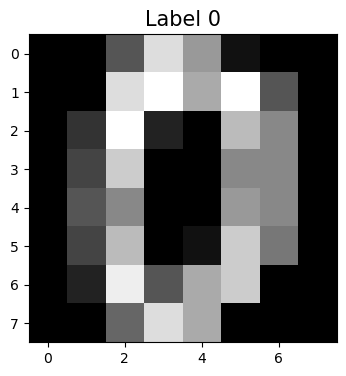

In [14]:
img_data, img_label = digits_data.data[0], digits_data.target[0]

plot_img(img_data, img_label)

# Loading data into X & y variables

In [17]:
X = pd.DataFrame(digits_data.data)
y = digits_data.target

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
# Standard Scaler
def scaling_data(Xtrain, Xtest):
    sc = StandardScaler()
    Xtrain_scaled, Xtest_scaled = sc.fit_transform(Xtrain), sc.transform(Xtest)
    return Xtrain_scaled, Xtest_scaled

#Factor Analysis
def fit_FactorAnalysis(scaled_Xtrain, scaled_Xtest, ytrain, n=1):
    fa = FA(n_components=n)
    Xtrain_FA = fa.fit_transform(scaled_Xtrain, ytrain)
    Xtest_FA = fa.transform(scaled_Xtest)
    return Xtrain_FA, Xtest_FA

# Linear Discriminant Analysis
def fit_LDA(scaled_Xtrain, scaled_Xtest,ytrain, n=1):
    lda = LDA(n_components = n)
    Xtrain_LDA = lda.fit_transform(scaled_Xtrain,ytrain)
    Xtest_LDA = lda.transform(scaled_Xtest)
    return Xtrain_LDA, Xtest_LDA

# Pricipal component Analysis
def fit_PCA(scaled_Xtrain, scaled_Xtest, n=1):
    pca = PCA(n_components=n)
    Xtrain_PCA = pca.fit_transform(scaled_Xtrain)
    Xtest_PCA = pca.transform(scaled_Xtest)
    explained_variance = pca.explained_variance_ratio_
    return Xtrain_PCA, Xtest_PCA, explained_variance

# RandomForestClassifier
def Random_Forest(Xtrain, Xtest, ytrain, ytest):
    classifier = RandomForestClassifier(max_depth=2, random_state=0)
    classifier.fit(Xtrain, ytrain)
    y_pred = classifier.predict(Xtest)
    confusion_mat = confusion_matrix(ytest, y_pred)
    acc_score = accuracy_score(y_test, y_pred)
    print(f"Confusion Matrix: \n{confusion_mat}\n")
    print('Accuracy {0}\n\n'.format(acc_score*100))

# Fitting Random Forest Classifier Model without performing PCA, LDA & Factor Analysis

In [41]:
Random_Forest(X_train, X_test, y_train, y_test)

Confusion Matrix: 
[[27  0  0  0  0  0  0  0  0  0]
 [ 0 19  4  3  3  2  3  0  0  1]
 [ 1  0 30  4  0  0  0  1  0  0]
 [ 0  1  0 28  0  0  0  0  0  0]
 [ 1  0  0  0 27  0  0  2  0  0]
 [ 2  0  0  1  1 33  0  0  0  3]
 [ 1  0  0  1  0  0 42  0  0  0]
 [ 1  0  0  0  0  0  0 38  0  0]
 [ 0  5  9  4  0  0  0  2 16  3]
 [ 0  0  0  6  0  1  0  3  0 31]]

Accuracy 80.83333333333333




# Scaling Data with StandardScaler

In [28]:
scaled_X_train, scaled_X_test = scaling_data(X_train, X_test)

# Performing PCA and Fitting Random Forest Classifier Model with splitted data

In [42]:
PCA_X_train, PCA_X_test, exp_var = fit_PCA(scaled_X_train, scaled_X_test, 35)

print(f"Explained Variance: {exp_var}\n\n")
Random_Forest(PCA_X_train, PCA_X_test, y_train, y_test)

Explained Variance: [0.12164624 0.09634853 0.08578334 0.06457027 0.04897962 0.04183235
 0.03929765 0.03282099 0.02979124 0.02809632 0.02741238 0.02602094
 0.02304403 0.02207157 0.02049244 0.01784251 0.01735509 0.01662399
 0.0162418  0.01510787 0.01347539 0.01294906 0.01171336 0.01062519
 0.01039409 0.00941718 0.00932621 0.00840484 0.00827657 0.00789877
 0.00749641 0.00715125 0.00664759 0.00641026 0.00594165]


Confusion Matrix: 
[[27  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  2  1  3  2  0  1]
 [ 1  0 30  2  0  0  0  2  1  0]
 [ 0  0  1 27  0  0  0  0  1  0]
 [ 0  1  0  0 27  0  0  2  0  0]
 [ 1  0  0  0  0 37  0  0  0  2]
 [ 2  2  0  0  0  0 40  0  0  0]
 [ 1  0  1  1  3  0  0 33  0  0]
 [ 1  4  0  4  0  1  0  2 24  3]
 [ 3  0  1  5  2  1  2  3  0 24]]

Accuracy 81.94444444444444




35 is the number of conponents for the best accuracy

# Performing LDA and Fitting Random Forest Classifier Model with splitted data

In [47]:
LDA_X_train, LDA_X_test = fit_LDA(scaled_X_train, scaled_X_test, y_train, 9)

Random_Forest(LDA_X_train, LDA_X_test, y_train, y_test)

Confusion Matrix: 
[[27  0  0  0  0  0  0  0  0  0]
 [ 0 30  1  0  2  0  0  0  0  2]
 [ 0  0 35  1  0  0  0  0  0  0]
 [ 0  1  1 26  0  0  0  0  0  1]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 36  0  2  0  2]
 [ 0  0  1  0  1  0 42  0  0  0]
 [ 0  0  0  1  2  0  0 35  0  1]
 [ 0 22  1  0  0  0  0  0 10  6]
 [ 2  2  0  7  0  0  0  3  1 26]]

Accuracy 82.22222222222221




# Performing Factor Analysis and Fitting Random Forest Classifier Model with splitted data

In [58]:
FA_X_train, FA_X_test = fit_FactorAnalysis(scaled_X_train, scaled_X_test, y_train, 33)

Random_Forest(FA_X_train, FA_X_test, y_train, y_test)

Confusion Matrix: 
[[27  0  0  0  0  0  0  0  0  0]
 [ 0 22  6  0  1  1  2  0  0  3]
 [ 0  4 27  0  1  0  0  3  1  0]
 [ 0  0  2 25  0  1  0  0  0  1]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 3  0  0  0  0 36  0  0  0  1]
 [ 1  1  1  0  0  1 39  0  1  0]
 [ 2  0  0  3  3  0  0 29  0  2]
 [ 3 12  1  2  0  4  0  1 13  3]
 [ 1  1  0  4  0  1  2  1  0 31]]

Accuracy 77.22222222222223




33 is the number of conponents for the best accuracy